In [181]:
import pandas as pd
import numpy as np
from numpy import arange
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model, svm, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


import warnings
warnings.filterwarnings('ignore')

In [61]:
# Link to source:
# https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets

df = pd.read_excel("Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")

In [62]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [177]:
for i in df.columns:
    if df[i].isnull().sum() !=0:
        print(i)
print("Done")

Done


In [65]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


Text(0.5, 1.0, 'Count of Each Class')

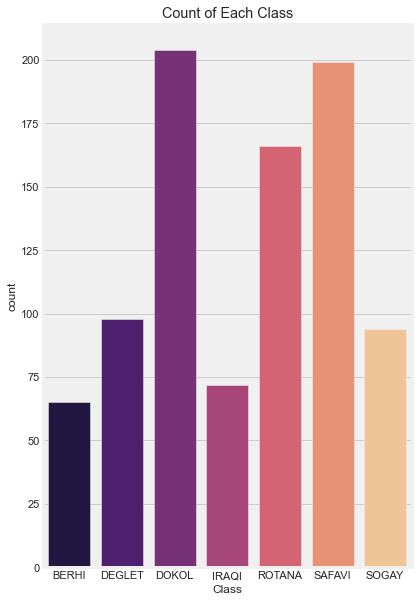

In [162]:
plt.figure(figsize=(20,10)) # set the size of the graph
plt.subplot(131)
sns.countplot(x='Class', data = df, palette="magma")
plt.title("Count of Each Class") # Descriptive Title

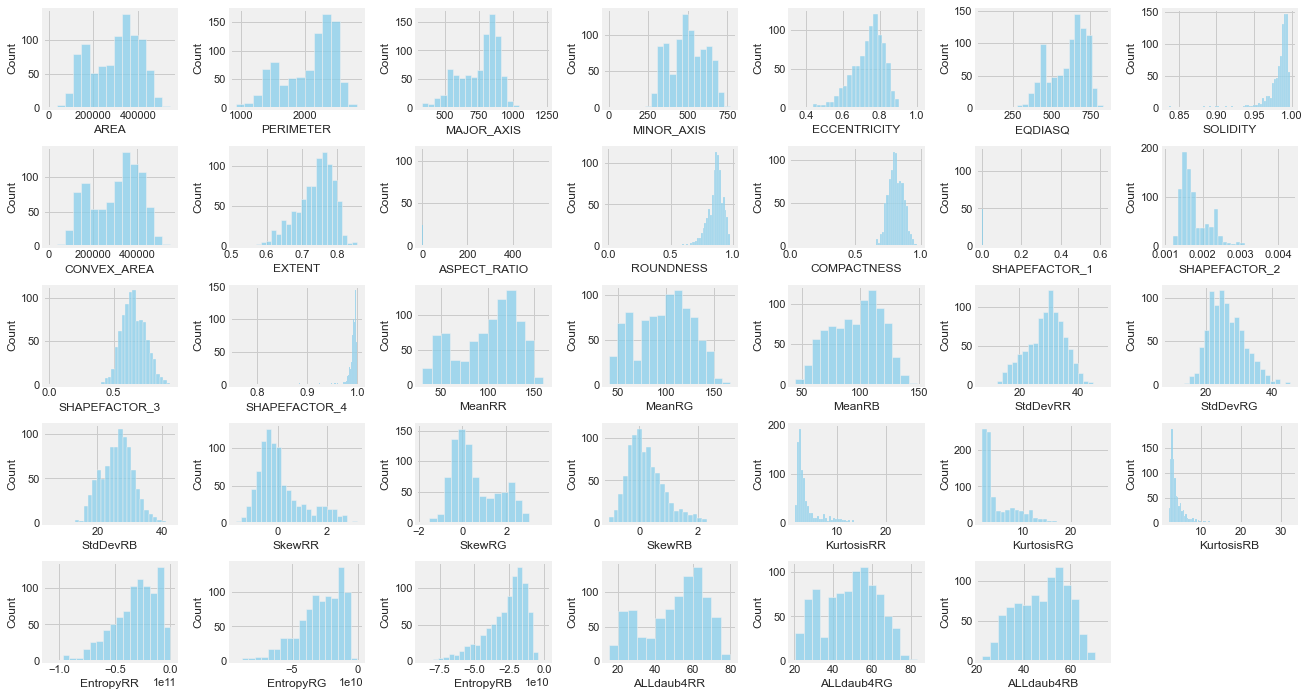

In [178]:
list_col = list(df.columns)
list_col.remove("Class")
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(list_col):
    ax = fig.add_subplot(5, 7, num +1)
    ax = sns.histplot(x=df[column_name], color='skyblue')

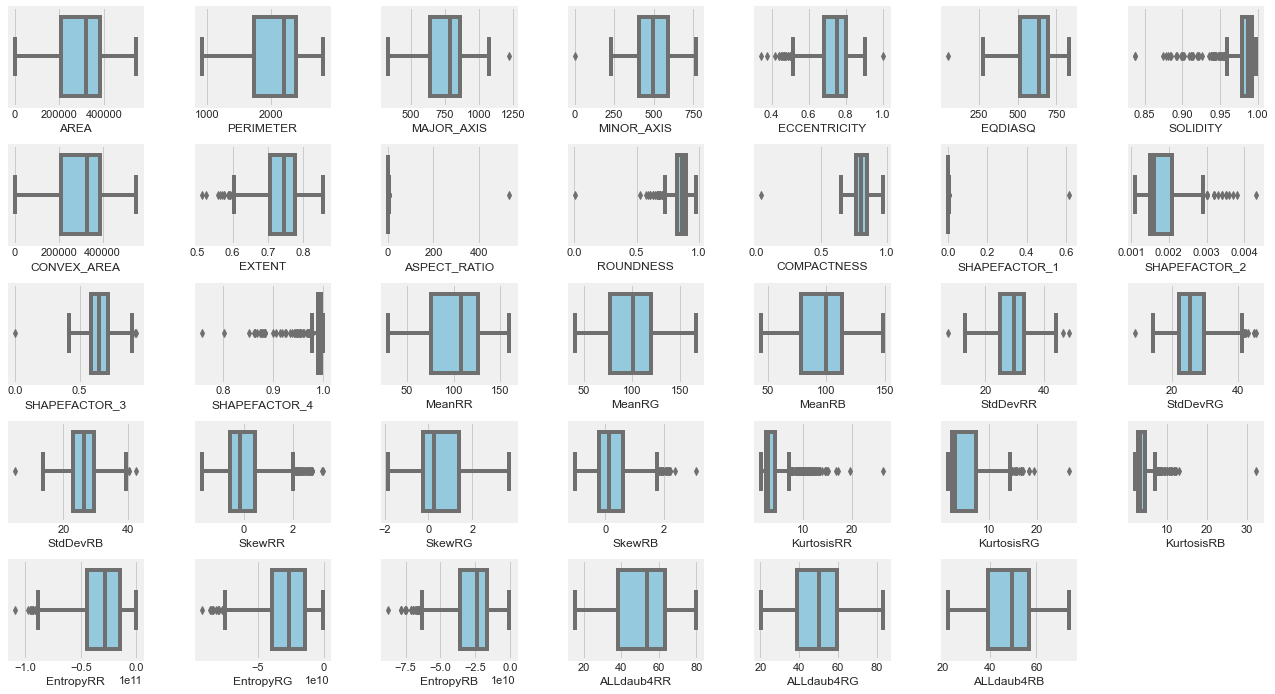

In [155]:
list_col = list(df.columns)
list_col.remove("Class")
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(list_col):
    ax = fig.add_subplot(5, 7, num +1)
    ax = sns.boxplot(x=df[column_name], color='skyblue')



#### Outliers need to be removed.

In [207]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Class']= label_encoder.fit_transform(df['Class'])
  
df['Class'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [208]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(df))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
df_clean = df[(z<3).all(axis=1)]
df_clean.shape

(793, 35)

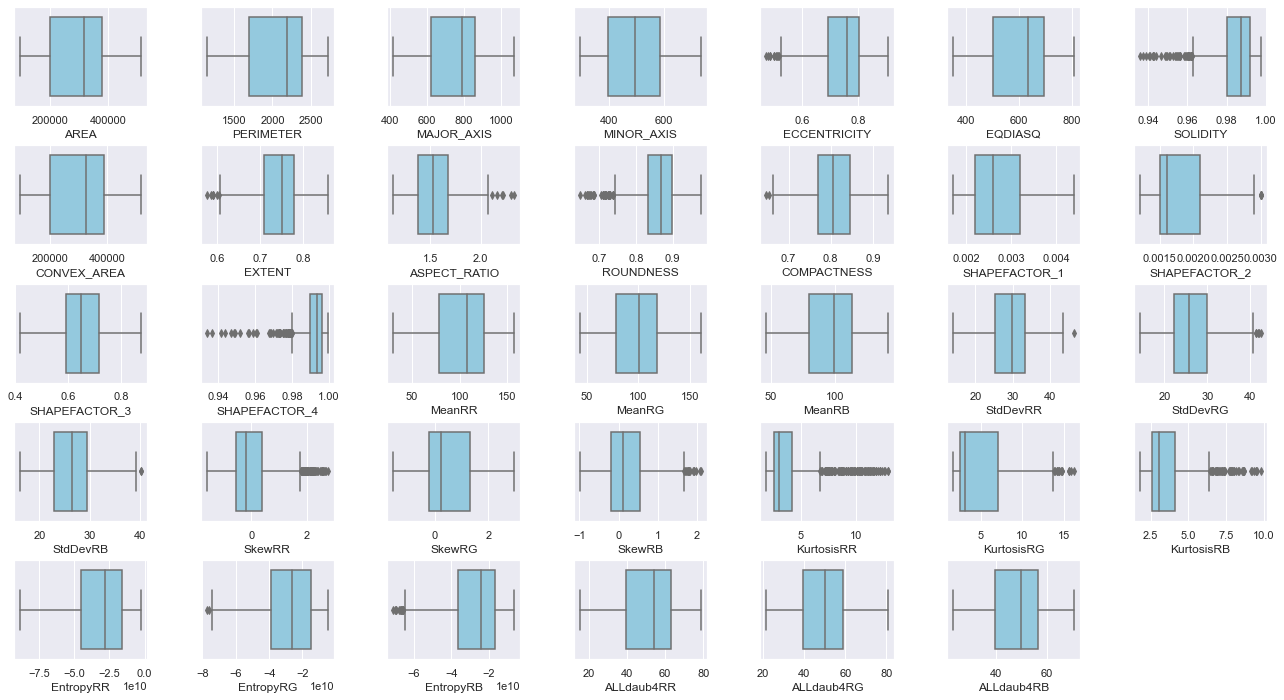

In [209]:
list_col = list(df_clean.columns)
list_col.remove("Class")
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(list_col):
    ax = fig.add_subplot(5, 7, num +1)
    ax = sns.boxplot(x=df_clean[column_name], color='skyblue')

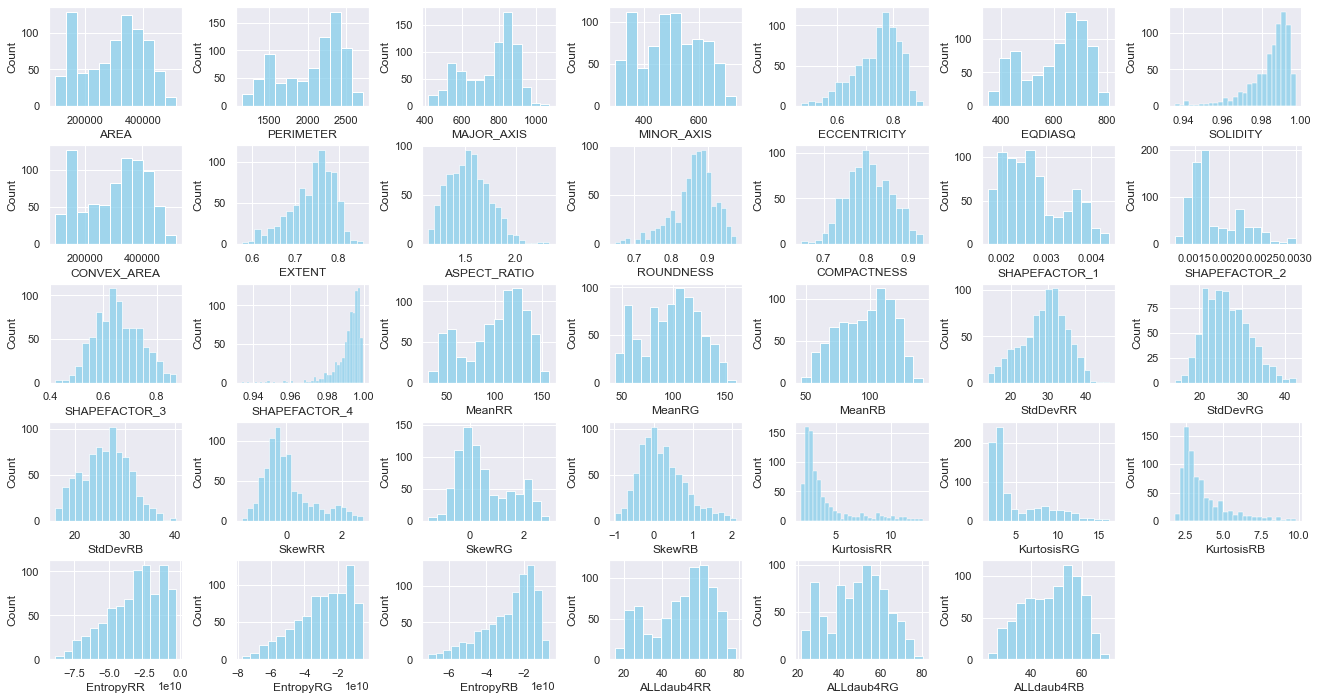

In [210]:
list_col = list(df_clean.columns)
list_col.remove("Class")
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(list_col):
    ax = fig.add_subplot(5, 7, num +1)
    ax = sns.histplot(x=df_clean[column_name], color='skyblue')

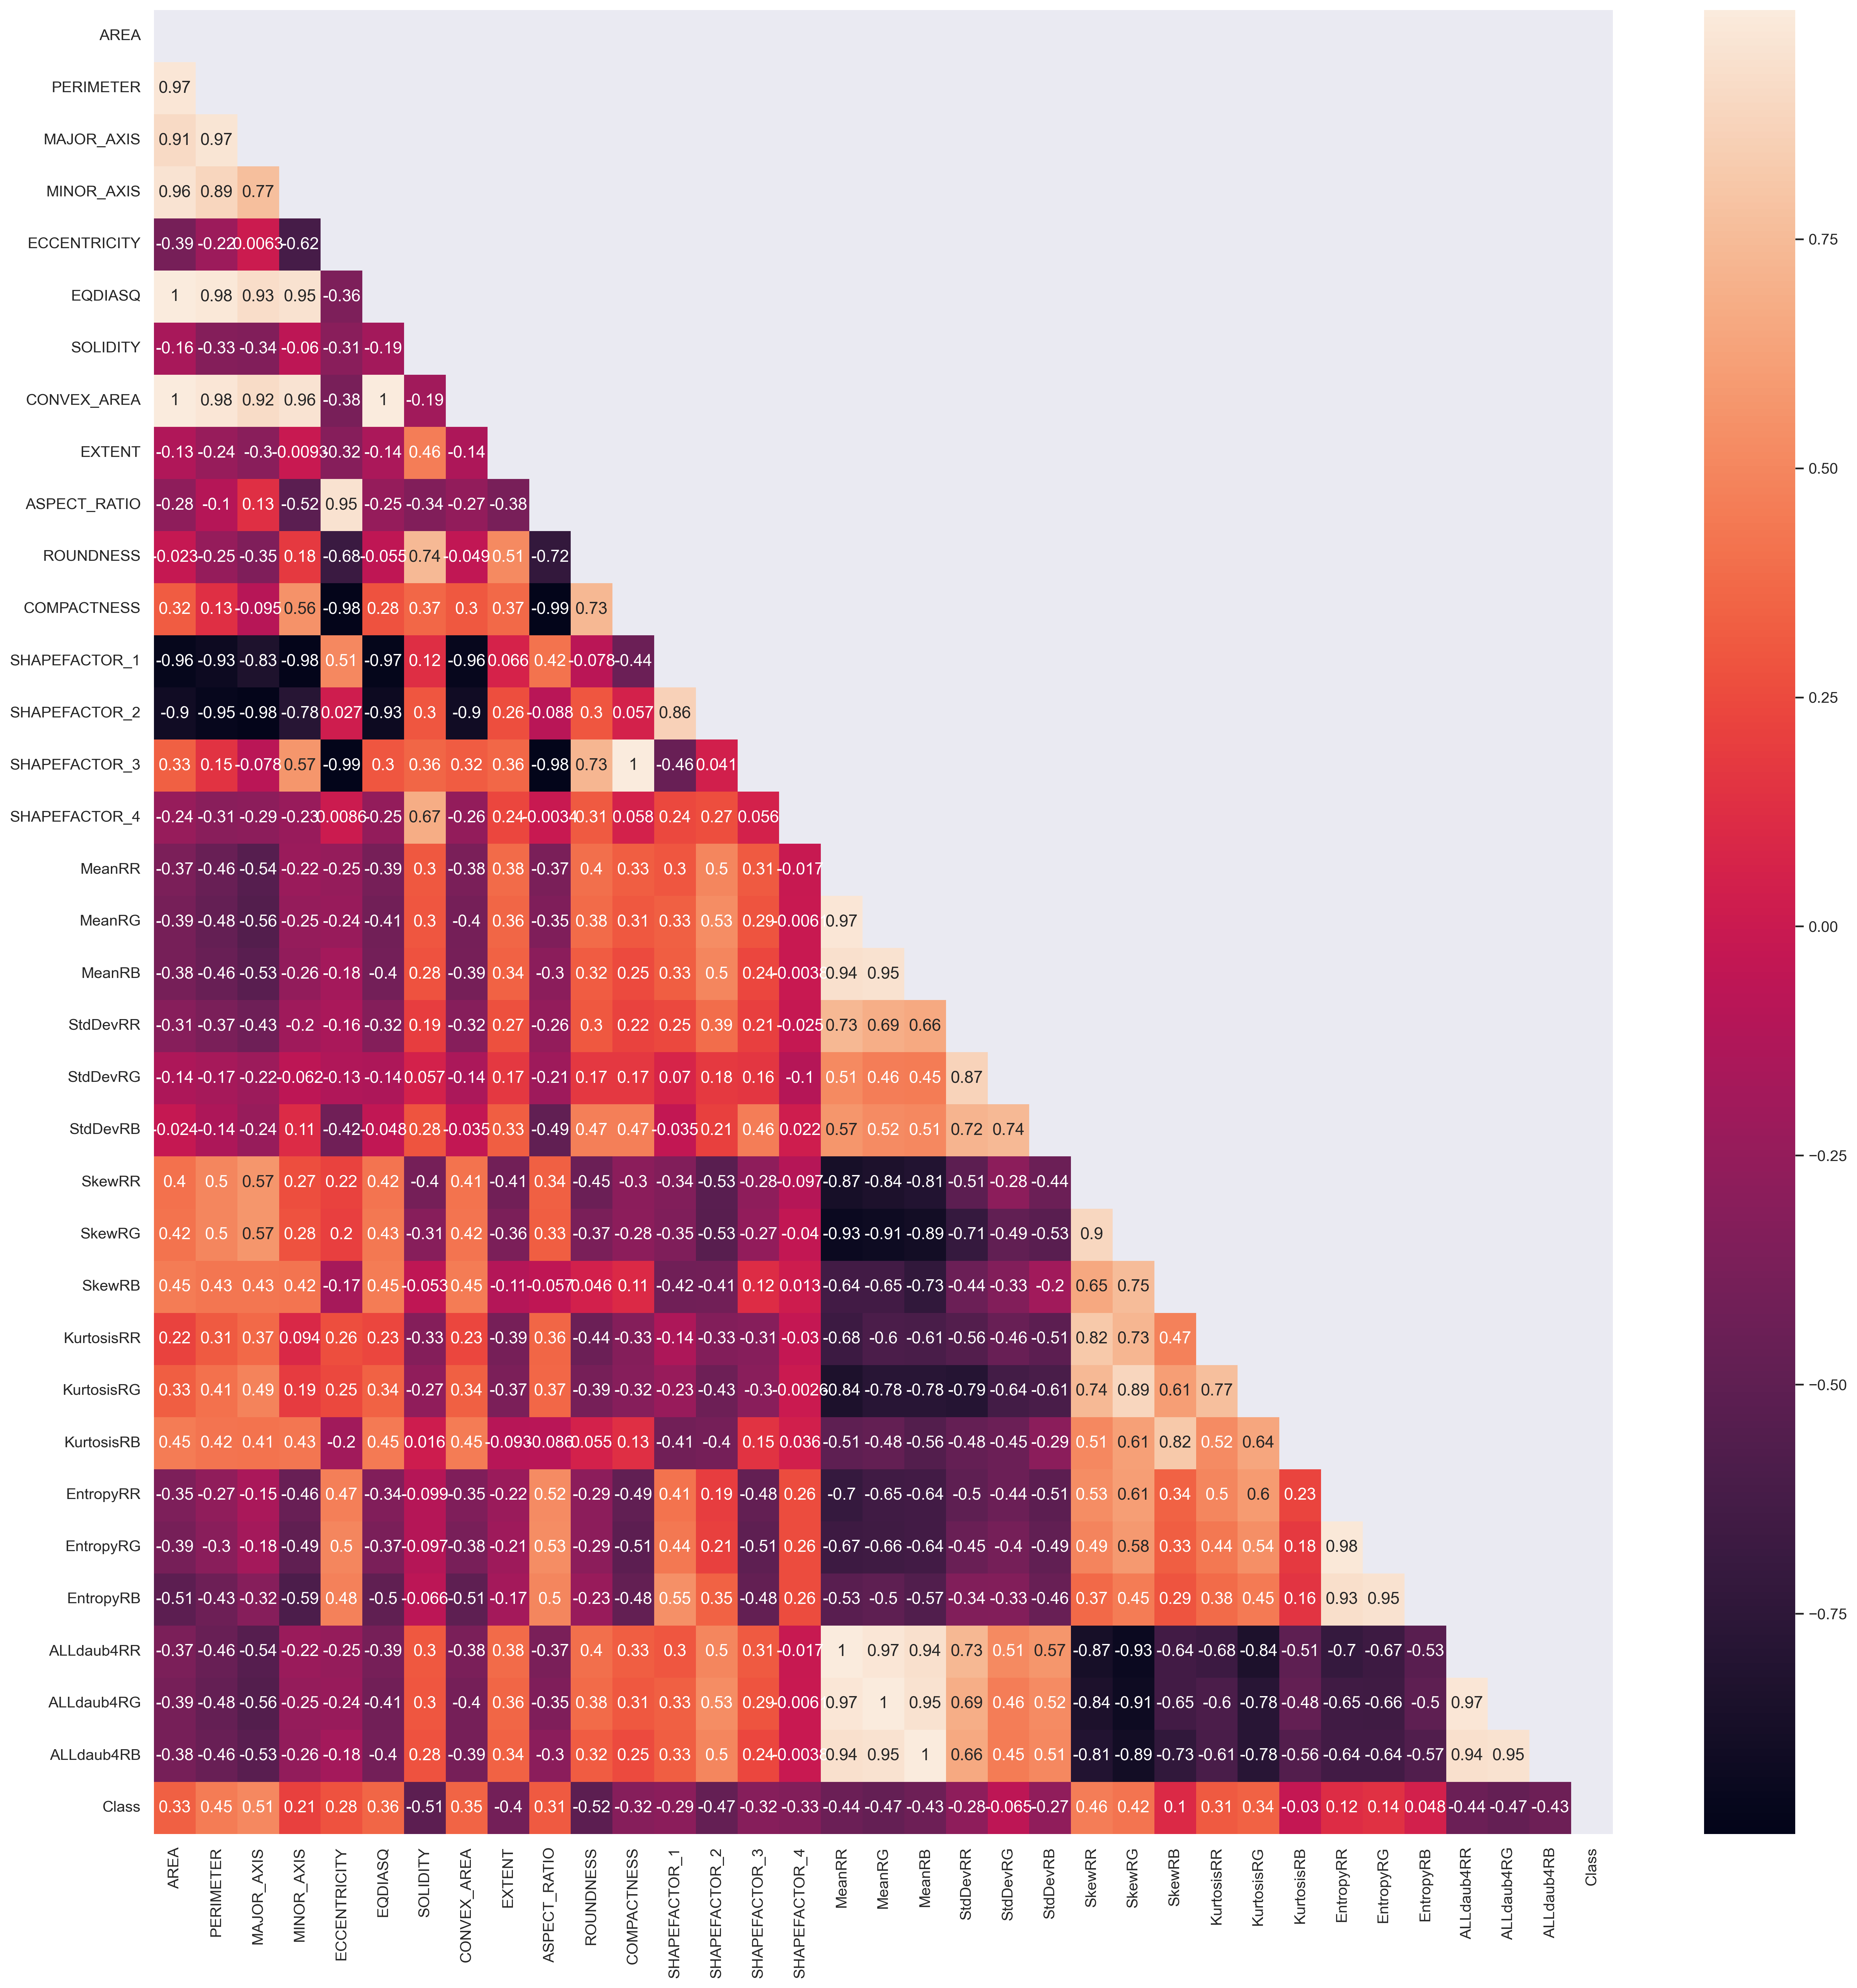

In [213]:
plt.figure(figsize=(20,20), dpi=300)
df_corr = df_clean.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, annot=True)
plt.tight_layout()

<AxesSubplot:>

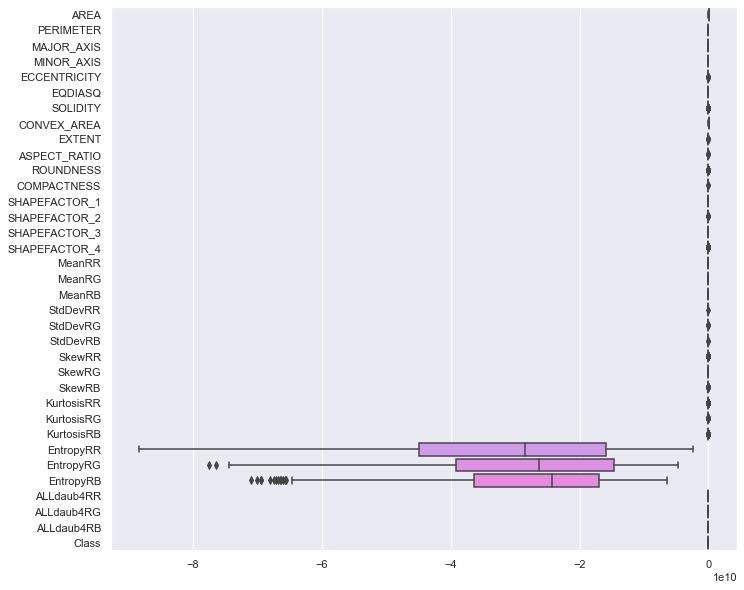

In [214]:
sns.set()
plt.figure(figsize = (10,10))
sns.boxplot(data=df_clean, orient="h")

#### Normalization is needed. Those three featueres indicate to me that I should do a min max scaling.

In [215]:
X = df_clean.drop('Class', axis =1)
Y= df_clean['Class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [216]:
sc = MinMaxScaler()

sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [217]:
X_train_sc.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.137406,0.228736,0.238964,0.111341,0.766212,0.200865,0.816856,0.140117,0.694395,0.454956,...,0.351432,0.026594,0.027735,0.057919,0.710792,0.708315,0.760138,0.766208,0.698071,0.740531
1,0.836331,0.818511,0.659800,0.857628,0.310620,0.878522,0.951378,0.834708,0.741878,0.103567,...,0.475521,0.134036,0.208449,0.287835,0.636023,0.606348,0.602024,0.424209,0.361645,0.386324
2,0.359854,0.472868,0.422074,0.368411,0.649201,0.457990,0.878444,0.361761,0.805070,0.321919,...,0.381901,0.065088,0.074252,0.167731,0.597433,0.687523,0.695235,0.681103,0.494663,0.586280
3,0.143063,0.228023,0.223844,0.138404,0.709117,0.208246,0.850891,0.144993,0.737594,0.383958,...,0.578385,0.122382,0.363811,0.484279,0.879572,0.933073,0.927760,0.472549,0.318530,0.416743
4,0.447535,0.607818,0.547408,0.397718,0.749295,0.545549,0.615883,0.460981,0.353445,0.432351,...,0.591829,0.834772,0.717326,0.564021,0.975134,0.965738,0.959399,0.068727,0.071744,0.128891


In [218]:
X_test_sc.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.229118,0.327016,0.312635,0.230643,0.694784,0.314322,0.883306,0.230510,0.829347,0.368051,...,0.542057,0.243773,0.544860,0.331997,0.896832,0.943789,0.909624,0.371737,0.231341,0.364453
1,0.347880,0.480325,0.482043,0.296564,0.794173,0.445541,0.865478,0.350211,0.776865,0.494893,...,0.223047,0.068939,0.081887,0.104835,0.720898,0.805076,0.782434,0.554094,0.383191,0.469445
2,0.470753,0.571300,0.533047,0.445868,0.683506,0.567771,0.920583,0.471102,0.742949,0.356078,...,0.297852,0.048263,0.073747,0.102172,0.624883,0.694277,0.692413,0.577148,0.435081,0.496130
3,0.405680,0.533158,0.531803,0.343353,0.789709,0.504506,0.907618,0.406556,0.278115,0.488362,...,0.389551,0.233949,0.856886,0.176509,0.993419,0.984636,0.942004,0.026042,0.045965,0.177675
4,0.683451,0.913650,0.760496,0.550485,0.779840,0.756313,0.272285,0.722221,0.649054,0.474046,...,0.703353,0.919717,0.648416,0.567679,0.968888,0.958566,0.966872,0.028287,0.014574,0.022103


In [219]:
lm = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class= 'ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
                   
lm.fit(X_train_sc, y_train)
lm.score(X_test_sc, y_test)

0.8679245283018868

In [220]:
lm.score(X_train_sc, y_train)

0.8974763406940063

#### Accuracy score of 87% for the test set is pretty good but leaves room for improvement.

In [221]:
train_pred = lm.predict(X_train_sc)


acc_score = accuracy_score(y_train, train_pred)
prec_score = precision_score(y_train, train_pred, average = 'weighted')
rec_score = recall_score(y_train, train_pred, average = 'weighted')

print('The accuracy score is:',"%.2f" % (acc_score*100))
print('The precision score is:', "%.2f" % (prec_score*100))
print('The recall score is:', "%.2f" % (rec_score*100))

The accuracy score is: 89.75
The precision score is: 89.81
The recall score is: 89.75


In [222]:
test_pred = lm.predict(X_test_sc)


acc_score = accuracy_score(y_test, test_pred)
prec_score = precision_score(y_test, test_pred, average = 'weighted')
rec_score = recall_score(y_test, test_pred, average = 'weighted')

print('The accuracy score is:',"%.2f" % (acc_score*100))
print('The precision score is:', "%.2f" % (prec_score*100))
print('The recall score is:', "%.2f" % (rec_score*100))

The accuracy score is: 86.79
The precision score is: 87.08
The recall score is: 86.79


In [ ]:
# This code finds the appropriate values for C, penalty, class_weight, and solver.

param_grid_lr = [
        {
         'C' : np.arange(.1,.5,.1),
         "penalty":['none', "l1","l2", "elasticnet"],
         "class_weight": [None, 'balanced'],
         'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag'],
         'multi_class' : ['auto', 'ovr', 'multinomial']
        }
]

logreg=LogisticRegression(dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,n_jobs=-1,
                   random_state=42, verbose=0,
                   warm_start=False)

logreg_cv=GridSearchCV(logreg,param_grid_lr,cv = 3)
logreg_cv.fit(X_train_sc,y_train)

print("Tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :", "%.2f" % (logreg_cv.best_score_*100))

#### Tuned hyperparameters :(best parameters)  {'C': 0.1, 'class_weight': None, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'sag'} Accuracy : 91.48

In [224]:
train_pred = logreg_cv.predict(X_train_sc)


acc_score = accuracy_score(y_train, train_pred)
prec_score = precision_score(y_train, train_pred, average = 'weighted')
rec_score = recall_score(y_train, train_pred, average = 'weighted')

print('The accuracy score is:',"%.2f" % (acc_score*100))
print('The precision score is:', "%.2f" % (prec_score*100))
print('The recall score is:', "%.2f" % (rec_score*100))

The accuracy score is: 96.37
The precision score is: 96.33
The recall score is: 96.37


In [225]:
test_pred = logreg_cv.predict(X_test_sc)


acc_score = accuracy_score(y_test, test_pred)
prec_score = precision_score(y_test, test_pred, average = 'weighted')
rec_score = recall_score(y_test, test_pred, average = 'weighted')

print('The accuracy score is:',"%.2f" % (acc_score*100))
print('The precision score is:', "%.2f" % (prec_score*100))
print('The recall score is:', "%.2f" % (rec_score*100))

The accuracy score is: 91.82
The precision score is: 91.98
The recall score is: 91.82


#### Using gridsearchcv, the scores improved which tells me the model efficiently finds true positives.

## I would like to see how other classifiers perform compared to LogisticRegresson. 

In [226]:
# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X_train_sc, y_train)
    test_pred = c.predict(X_test_sc)
    acc_score = accuracy_score(y_test, test_pred)
    prec_score = precision_score(y_test, test_pred, average = 'weighted')
    rec_score = recall_score(y_test, test_pred, average = 'weighted')

    print('Scores for ', str(c))
    print('The accuracy score is:',"%.2f" % (acc_score*100))
    print('The precision score is:', "%.2f" % (prec_score*100))
    print('The recall score is:', "%.2f" % (rec_score*100))
    print('')



Scores for  LogisticRegression()
The accuracy score is: 92.45
The precision score is: 92.97
The recall score is: 92.45

Scores for  LinearSVC()
The accuracy score is: 91.82
The precision score is: 91.81
The recall score is: 91.82

Scores for  SVC()
The accuracy score is: 89.94
The precision score is: 91.16
The recall score is: 89.94

Scores for  KNeighborsClassifier()
The accuracy score is: 89.31
The precision score is: 90.49
The recall score is: 89.31



#### Looks like LogReg has the highest accuracy score. Although I would like to try SVC.

In [227]:
rbf = svm.SVC(kernel='rbf').fit(X_train_sc, y_train)
poly = svm.SVC(kernel='poly').fit(X_train_sc, y_train)
linear = svm.SVC(kernel='linear').fit(X_train_sc, y_train)
sigmoid = svm.SVC(kernel='sigmoid').fit(X_train_sc, y_train)

In [228]:
rbf_pred = rbf.predict(X_test_sc)
poly_pred = poly.predict(X_test_sc)
linear_pred = linear.predict(X_test_sc)
sigmoid_pred = sigmoid.predict(X_test_sc)


In [229]:
predictions = [rbf_pred, poly_pred, linear_pred, sigmoid_pred]

In [230]:
for i in predictions:
    accuracy = accuracy_score(y_test, i)
    f1 = f1_score(y_test, i, average='weighted')
    
    print('Accuracy: ',"%.2f" % (accuracy*100))
    print('F1: ' ,"%.2f" % (f1*100))

Accuracy:  89.94
F1:  90.02
Accuracy:  90.57
F1:  90.69
Accuracy:  90.57
F1:  90.70
Accuracy:  20.75
F1:  7.13


#### Hypertuning parameters using gridsearchcv could improve accuracy. But I think it makes more sense to go with LogReg for this dataset.